Blending

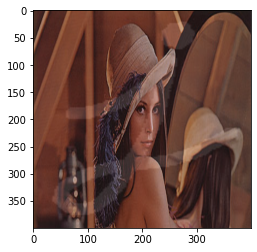

In [21]:
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.5

image1 = cv2.imread('lena.jpg')
image2 = cv2.imread('j.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

resized1 = cv2.resize(image1, (400,400))
resized2 = cv2.resize(image2, (400,400))

added_image = cv2.addWeighted(resized1,0.7,resized2,0.1,0)

plt.imshow(added_image)









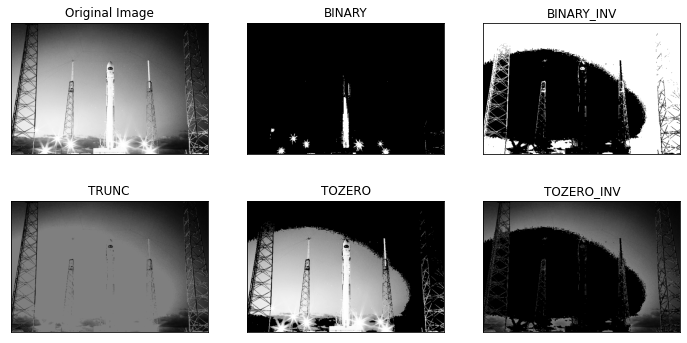

In [12]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('rocket.jpg',0)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
plt.figure(figsize= (12, 6))
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Adaptive Thresholding

In the previous section, we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

It has three ‘special’ input params and only one output argument.

Adaptive Method - It decides how thresholding value is calculated.
cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
Block Size - It decides the size of neighbourhood area.

C - It is just a constant which is subtracted from the mean or weighted mean calculated.

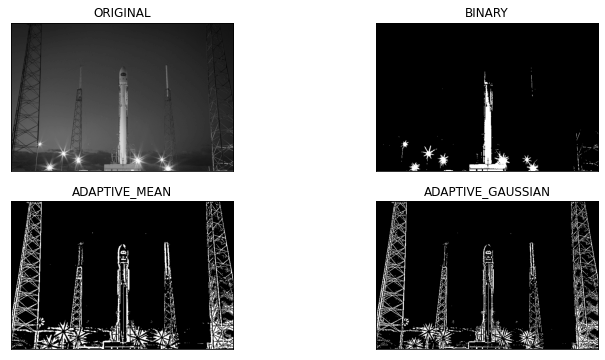

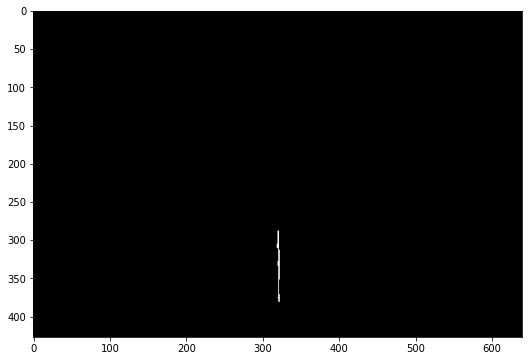

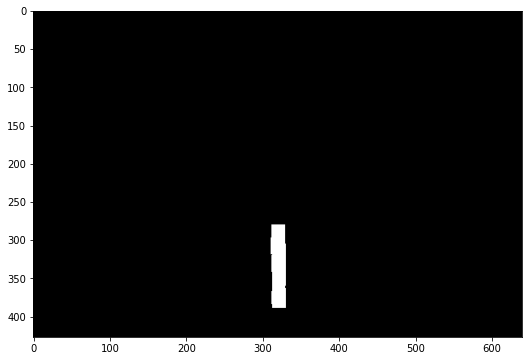

In [32]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('rocket.jpg',0)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,11, 5)
thresh3 =cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 5)
plt.figure(figsize= (12, 6))
images = [img, thresh1, thresh2, thresh3]
titles = ['ORIGINAL','BINARY','ADAPTIVE_MEAN','ADAPTIVE_GAUSSIAN']
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

SE = np.ones((9,9), np.uint8)
erosion = cv2.erode(thresh1, SE, iterations=2)
plt.figure(figsize= (12, 6))
plt.imshow(erosion, cmap='gray')
plt.show()

dilated = cv2.dilate(erosion, SE, iterations=2)
plt.figure(figsize= (12, 6))
plt.imshow(dilated, cmap='gray')
plt.show()


